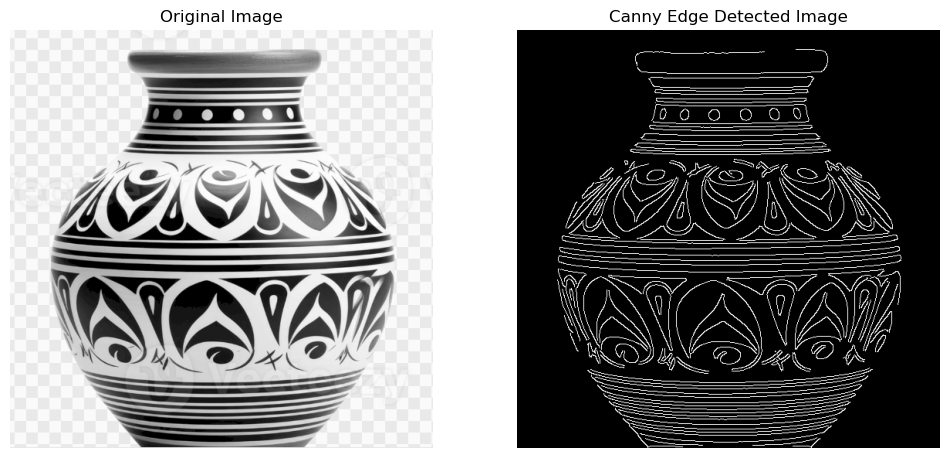

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Load the image in grayscale
image = cv2.imread(r'a.png', cv2.IMREAD_GRAYSCALE)

# Check if the image was loaded successfully
if image is None:
    print("Error: Image not found")
    exit()

# Apply Gaussian Blur to reduce noise (optional but improves edge detection)
blurred_image = cv2.GaussianBlur(image, (5, 5), 1.4)

# Apply Canny edge detection
edges = cv2.Canny(blurred_image, 100, 200)

# Display the results
plt.figure(figsize=(12, 6))

# Plot the original image
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Plot the Canny edge-detected image
plt.subplot(1, 2, 2)
plt.imshow(edges, cmap='gray')
plt.title('Canny Edge Detected Image')
plt.axis('off')

plt.show()

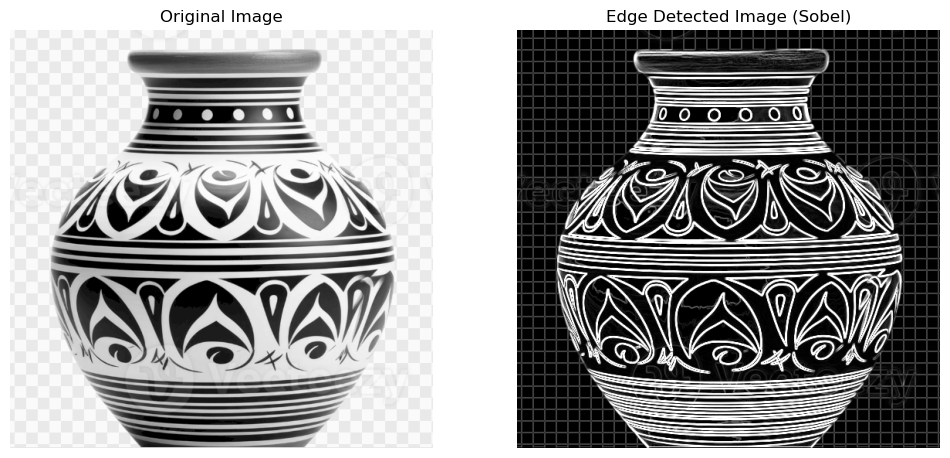

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image (you can replace 'your_image.jpg' with your own image file path)
image = cv2.imread(r'a.png', cv2.IMREAD_GRAYSCALE)

# Check if the image was loaded successfully
if image is None:
    print("Error: Image not found")
    exit()

# Apply Sobel operator to calculate the gradient in the x and y directions
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)  # Gradient in x direction
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)  # Gradient in y direction

# Calculate the gradient magnitude
magnitude = np.sqrt(sobel_x**2 + sobel_y**2)

# Convert magnitude to uint8 for display
magnitude_display = np.uint8(np.clip(magnitude, 0, 255))

# Plot the original and processed images
plt.figure(figsize=(12, 6))

# Plot the original image
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Plot the edge-detected image (gradient magnitude)
plt.subplot(1, 2, 2)
plt.imshow(magnitude_display, cmap='gray')
plt.title('Edge Detected Image (Sobel)')
plt.axis('off')

plt.show()

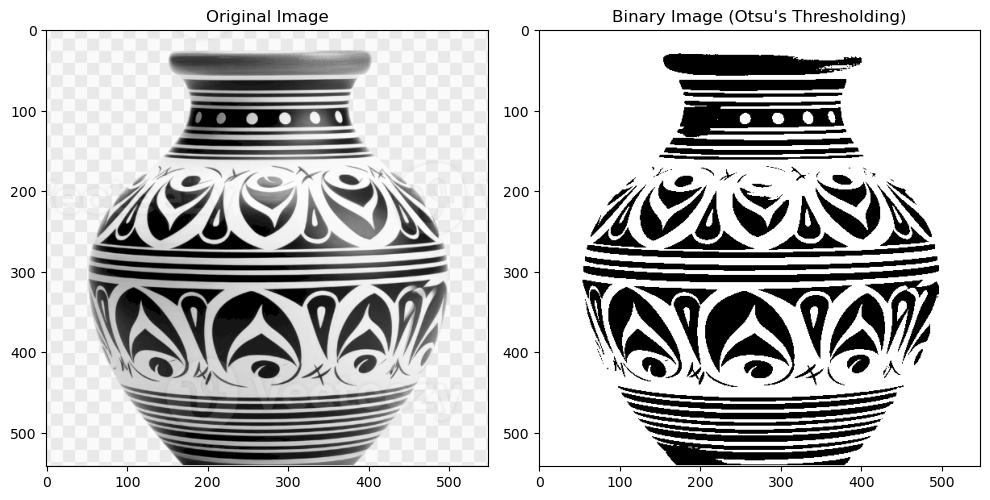

In [4]:
import cv2
from matplotlib import pyplot as plt

# Load the image in grayscale mode
image = cv2.imread('a.png', cv2.IMREAD_GRAYSCALE)

# Apply Otsu's thresholding
# The function returns two values: the threshold value and the thresholded image
_, binary_image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Display the original and binary images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Binary Image (Otsu's Thresholding)")
plt.imshow(binary_image, cmap='gray')

plt.tight_layout()
plt.show()


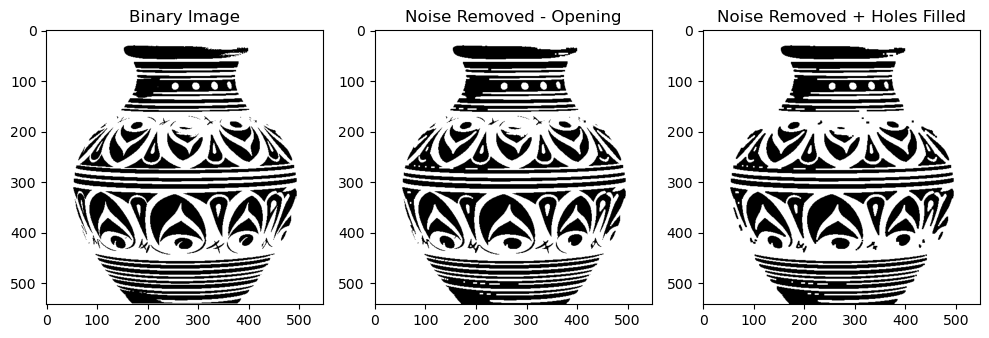

In [5]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load an image in grayscale (replace 'input_image.jpg' with your actual image path)
image = cv2.imread('a.png', cv2.IMREAD_GRAYSCALE)

# Step 1: Convert to Binary using Otsu's Thresholding
_, binary_image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Display the binary image
plt.figure(figsize=(10, 6))
plt.subplot(131)
plt.title("Binary Image")
plt.imshow(binary_image, cmap="gray")

# Step 2: Apply Morphological Operations for Noise Removal
# Define a kernel for morphological transformations
kernel = np.ones((3, 3), np.uint8)

# Perform Dilation followed by Erosion (Morphological Opening) to remove small noise
opened_image = cv2.morphologyEx(binary_image, cv2.MORPH_OPEN, kernel)

# Display the morphologically processed image
plt.subplot(132)
plt.title("Noise Removed - Opening")
plt.imshow(opened_image, cmap="gray")

# Optional: Apply Closing to Fill Small Holes in the Objects (Dilation followed by Erosion)
closed_image = cv2.morphologyEx(opened_image, cv2.MORPH_CLOSE, kernel)

# Display the final processed image with closed holes
plt.subplot(133)
plt.title("Noise Removed + Holes Filled")
plt.imshow(closed_image, cmap="gray")

plt.tight_layout()
plt.show()

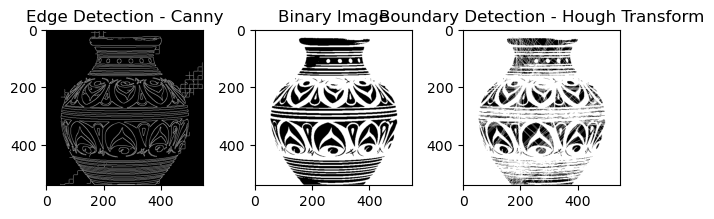

In [6]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Step 1: Load the Image and Convert to Grayscale
# Replace 'your_image.jpg' with the path to your image file
image = cv2.imread('a.png', cv2.IMREAD_GRAYSCALE)

# Step 2: Edge Detection using Canny (or Sobel if you prefer)
# Using Canny edge detection to create an edge map
edges = cv2.Canny(image, threshold1=50, threshold2=150)

# Display the edge-detected image
plt.subplot(1, 3, 1)
plt.title('Edge Detection - Canny')
plt.imshow(edges, cmap='gray')

# Step 3: Binary Conversion (Using Otsu's Thresholding)
_, binary_image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Display the binary image
plt.subplot(1, 3, 2)
plt.title("Binary Image")
plt.imshow(binary_image, cmap="gray")

# Step 4: Apply Hough Transform for Boundary Detection
# Detect lines in the edge-detected image
lines = cv2.HoughLines(edges, 1, np.pi / 180, 100)

# Create a copy of the binary image to draw lines
boundary_image = np.copy(binary_image)

# Draw the detected lines on the image
if lines is not None:
    for line in lines:
        rho, theta = line[0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        cv2.line(boundary_image, (x1, y1), (x2, y2), (255, 0, 0), 1)

# Display the boundary-detected image
plt.subplot(1, 3, 3)
plt.title("Boundary Detection - Hough Transform")
plt.imshow(boundary_image, cmap="gray")

plt.tight_layout()
plt.show()